In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [3]:
# Read MNIST data from CSV
train_data = pd.read_csv('train.csv')
train_data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(train_data)

42000

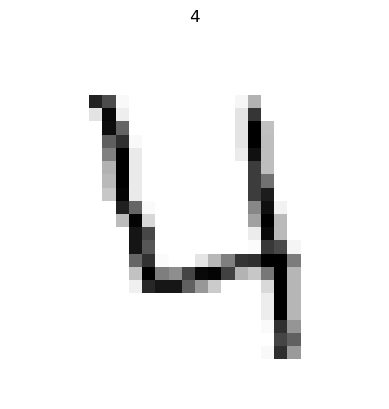

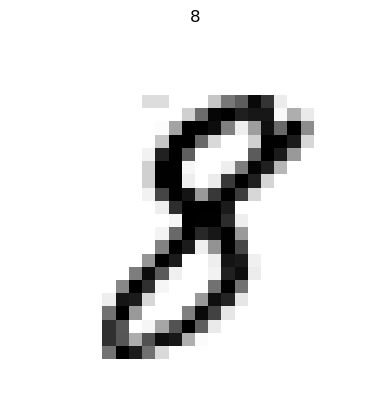

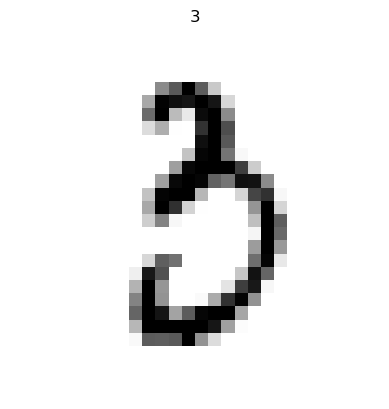

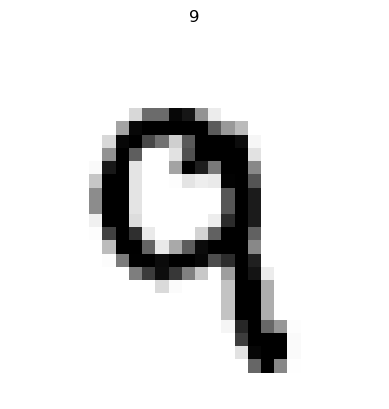

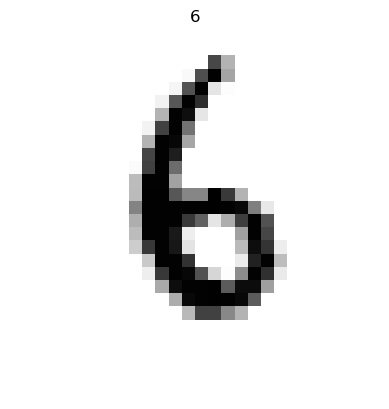

In [16]:

# Extract pixel values and labels
pixels = train_data.drop('label', axis=1).values
labels = train_data['label'].values

def visualize_mnist_image(image_pixels: np.ndarray, image_id: int) -> None:
    """Function to plot an MNIST image from CSV"""
    # Reshape pixel values into a 28x28 image
    image = image_pixels.reshape(28, 28)

    # Plot the image
    plt.imshow(image, cmap='binary')
    plt.title(labels[image_id])
    plt.axis('off')
    plt.show()

images_to_show = [3, 20, 150, 23000, 34583]

for image_id in images_to_show:
    visualize_mnist_image(pixels[image_id], image_id)

## Initialize parameters

In [18]:
def init_params() -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    
    return W1, b1, W2, b2

In [49]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU(Z):
    """Activation function ReLU"""
    return np.maximum(Z, 0)

def softmax(Z):
    """Softmax function"""
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y,np.arange(Y.size)] = 1
    return one_hot_Y

def backward_prop(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * (dZ2.dot(A1.T))
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [45]:
def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2   
    return W1, b1, W2, b2

In [43]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    _ , m = X.shape

    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(X, Y, A1, A2, W2, Z1, m)
        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [26]:
train_data = np.array(train_data)
m, n = train_data.shape
np.random.shuffle(train_data) # shuffle before splitting into dev and training sets

data_dev = train_data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = train_data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [51]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 2 7 ... 0 2 7] [4 7 2 ... 6 2 0]
0.12765853658536586
Iteration:  10
[4 7 2 ... 6 2 0] [4 7 2 ... 6 2 0]
0.4089512195121951
Iteration:  20
[4 7 2 ... 6 2 0] [4 7 2 ... 6 2 0]
0.5164390243902439
Iteration:  30
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.6881463414634146
Iteration:  40
[4 9 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.7713170731707317
Iteration:  50
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.806
Iteration:  60
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.8262926829268292
Iteration:  70
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.839780487804878
Iteration:  80
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.8512195121951219
Iteration:  90
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.8597560975609756
Iteration:  100
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.8655121951219512
Iteration:  110
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.8704878048780488
Iteration:  120
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.874780487804878
Iteration:  130
[4 7 2 ... 6 8 0] [4 7 2 ... 6 2 0]
0.8775365853658537
Iteration:  140
[4 7 2 ... 6 8 

In [55]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  2
Label:  2


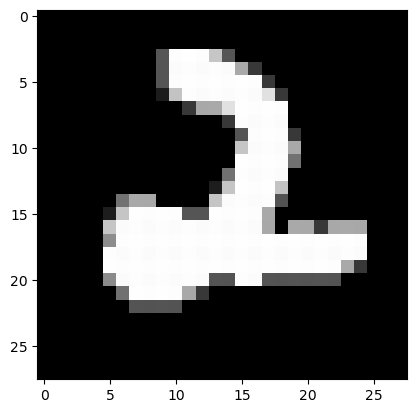

Prediction:  4
Label:  4


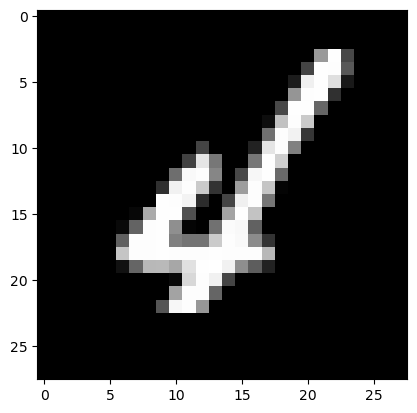

Prediction:  7
Label:  7


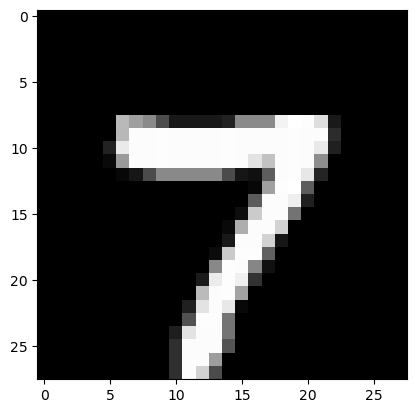

Prediction:  0
Label:  0


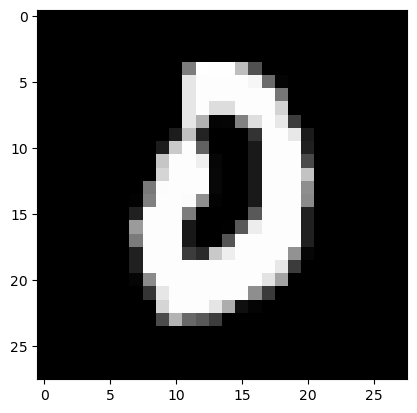

In [56]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(32, W1, b1, W2, b2)
test_prediction(83, W1, b1, W2, b2)
test_prediction(200, W1, b1, W2, b2)